# IMPORTATION DES LIBRAIRIES

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

In [45]:
path = './Covid_dataset.xlsx'
data = pd.read_excel(path)
df = data.copy()

In [46]:
pd.set_option('display.max_row', 120)
pd.set_option('display.max_column', df.shape[1])

In [47]:
df

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,negative,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

# EXPLORATORY DATA ANALYSIS

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Columns: 111 entries, Patient ID to ctO2 (arterial blood gas analysis)
dtypes: float64(70), int64(4), object(37)
memory usage: 4.8+ MB


# Form analysis

In [49]:
df.shape

(5644, 111)

In [50]:
# Dataset shape
print(f'Our dataset is a total of \'{df.shape[0]}\' rows and \'{df.shape[1]}\' columns')

Our dataset is a total of '5644' rows and '111' columns


In [51]:
df.dtypes.value_counts()

float64    70
object     37
int64       4
dtype: int64

<AxesSubplot:>

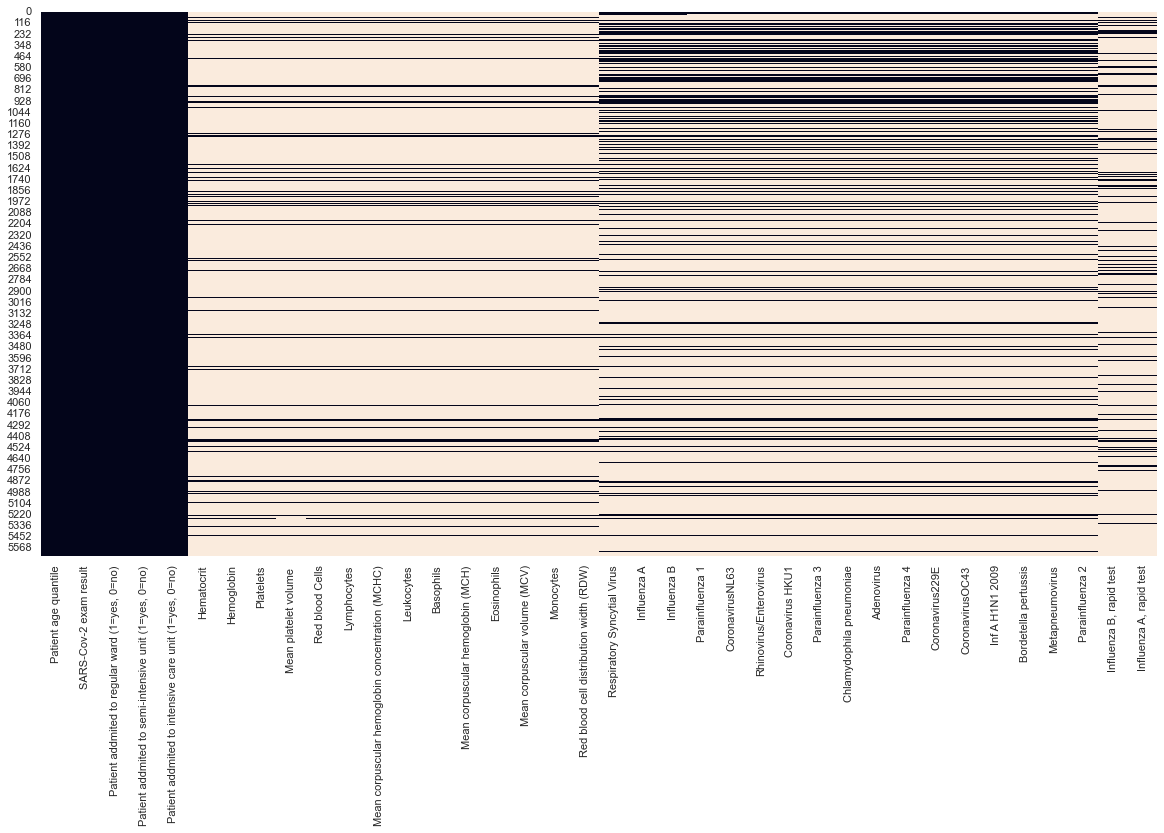

In [80]:
# Missing values
plt.figure(figsize=(20, 10))
sns.heatmap(df.isnull(), cbar=False)

In [53]:
(df.isna().mean()*100).sort_values(ascending=True)

Patient ID                                                 0.000000
Patient age quantile                                       0.000000
SARS-Cov-2 exam result                                     0.000000
Patient addmited to regular ward (1=yes, 0=no)             0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)      0.000000
Patient addmited to intensive care unit (1=yes, 0=no)      0.000000
Influenza B                                               76.009922
Respiratory Syncytial Virus                               76.009922
Influenza A                                               76.009922
Rhinovirus/Enterovirus                                    76.045358
Inf A H1N1 2009                                           76.045358
CoronavirusOC43                                           76.045358
Coronavirus229E                                           76.045358
Parainfluenza 4                                           76.045358
Adenovirus                                      

# In-depth analysis 


remove columns with high missed values

In [54]:
# Remove columns with missing values more than 90%

df = df[df.columns[df.isna().mean() < 0.90]] # remove variables with more that 90% missing values
df.drop(columns='Patient ID', inplace=True) # Remove 'Patient ID' column
df

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza B, rapid test","Influenza A, rapid test"
0,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative,negative
2,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,3,positive,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5640,17,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5641,4,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5642,10,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
df.shape

(5644, 38)

<AxesSubplot:>

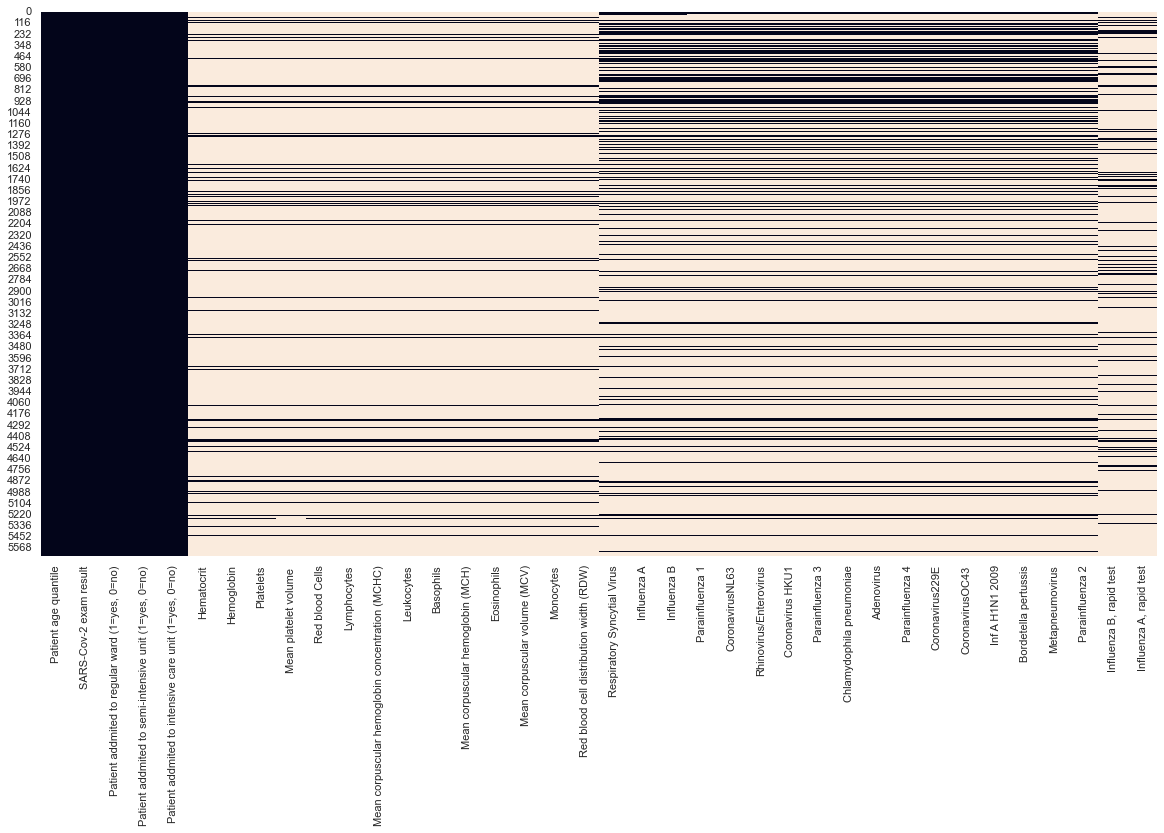

In [81]:
# Missing values
plt.figure(figsize=(20, 10))
sns.heatmap(df.isnull(), cbar=False)

# Target Visualization

In [56]:
# df['SARS-Cov-2 exam result'].value_counts()

df['SARS-Cov-2 exam result'].value_counts(normalize=True)
# df['SARS-Cov-2 exam result'].value_counts()

negative    0.901134
positive    0.098866
Name: SARS-Cov-2 exam result, dtype: float64

# in our target we can see that 10% are positive and 90% negative. we are dealing with unbalanced data

# histogram of continuous variables

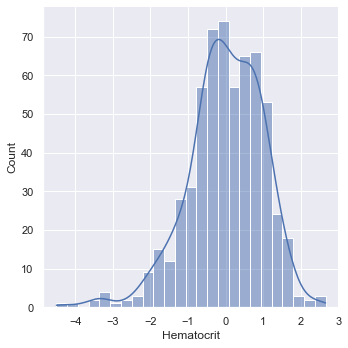

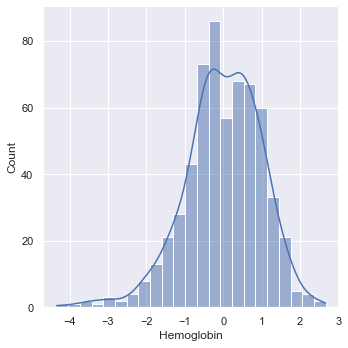

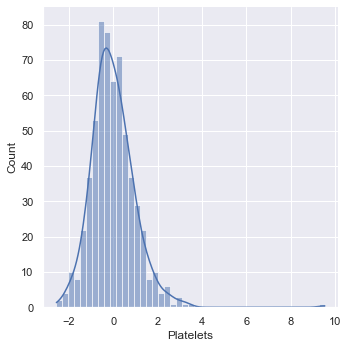

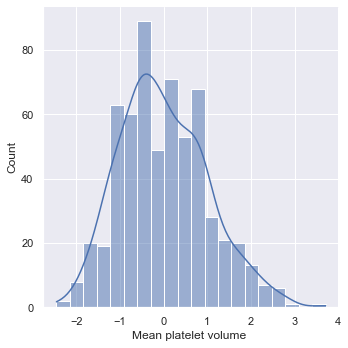

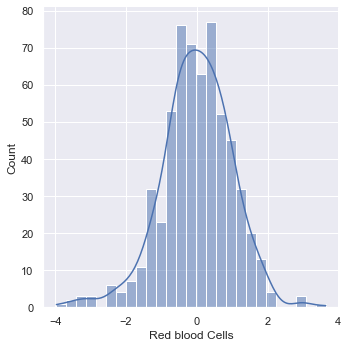

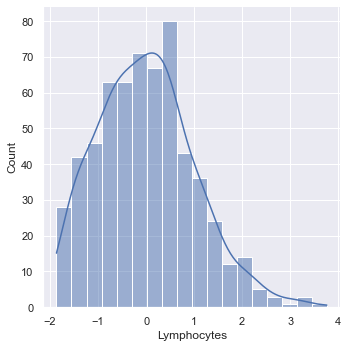

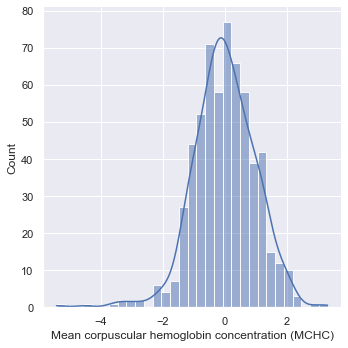

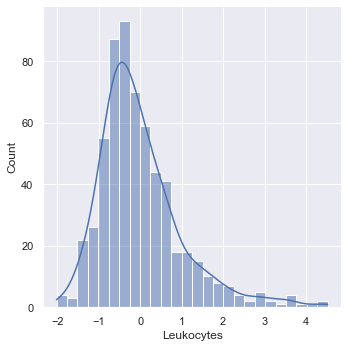

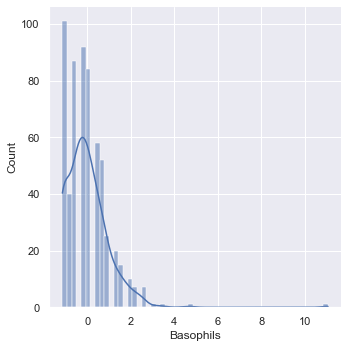

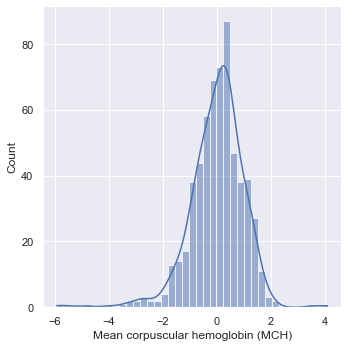

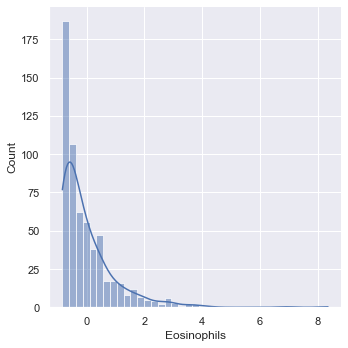

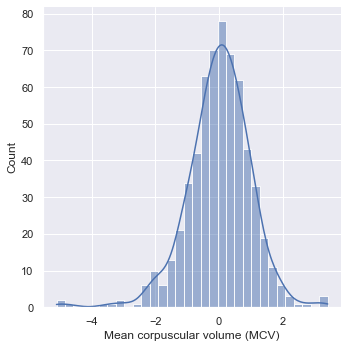

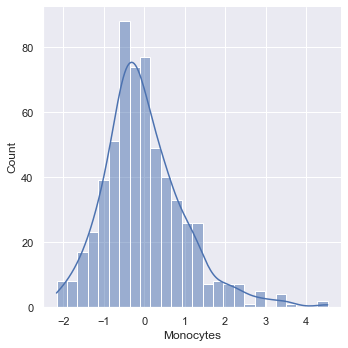

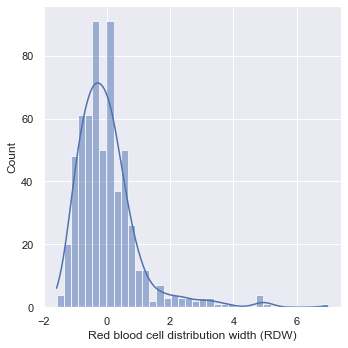

In [63]:
 for col in df.select_dtypes('float'):
    plt.figure
    sns.displot(df[col], kde=True)

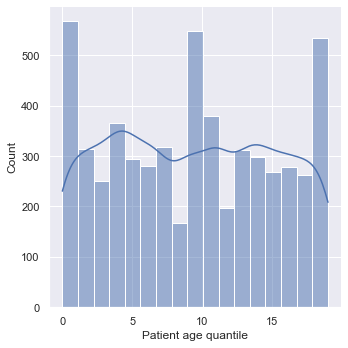

In [60]:
sns.displot(df['Patient age quantile'], kde=True)

# categorical variable

In [66]:
for col in df.select_dtypes('object'):
     print(f'{col:-<50} {df[col].unique()}')

SARS-Cov-2 exam result---------------------------- ['negative' 'positive']
Respiratory Syncytial Virus----------------------- [nan 'not_detected' 'detected']
Influenza A--------------------------------------- [nan 'not_detected' 'detected']
Influenza B--------------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 1----------------------------------- [nan 'not_detected' 'detected']
CoronavirusNL63----------------------------------- [nan 'not_detected' 'detected']
Rhinovirus/Enterovirus---------------------------- [nan 'detected' 'not_detected']
Coronavirus HKU1---------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 3----------------------------------- [nan 'not_detected' 'detected']
Chlamydophila pneumoniae-------------------------- [nan 'not_detected' 'detected']
Adenovirus---------------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 4----------------------------------- [nan 'not_detected' 'detected']
Coronavirus2

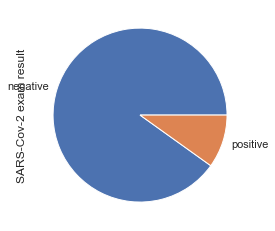

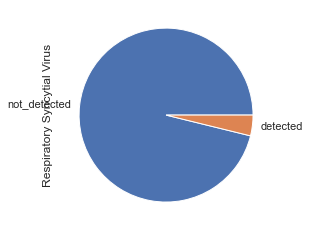

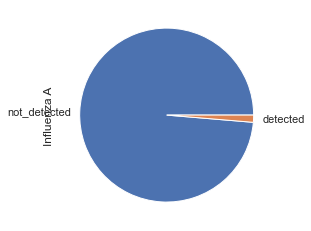

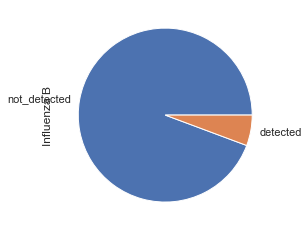

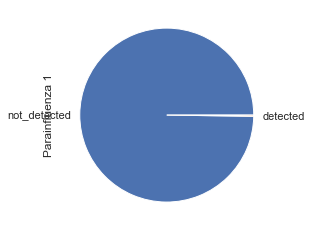

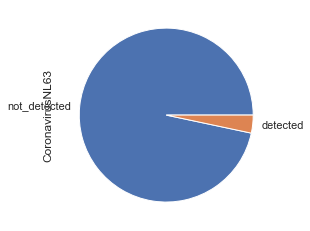

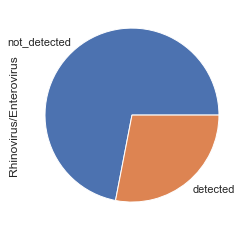

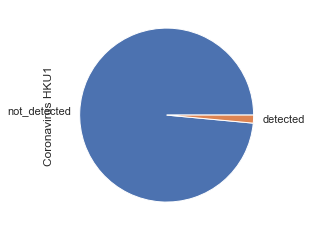

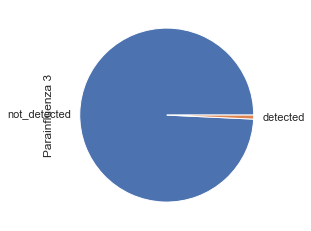

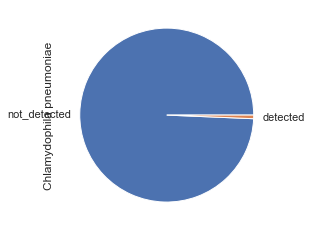

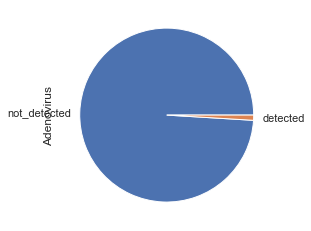

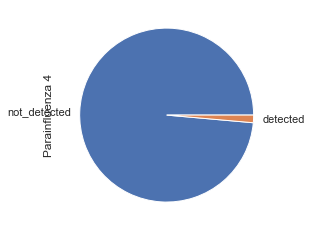

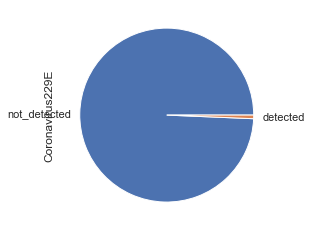

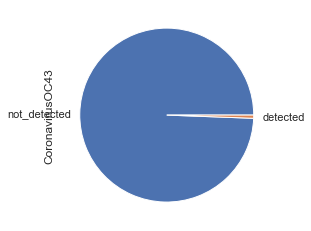

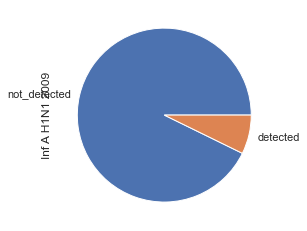

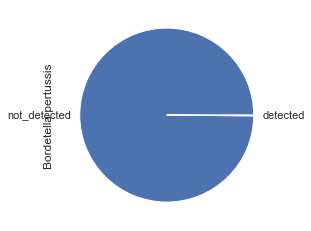

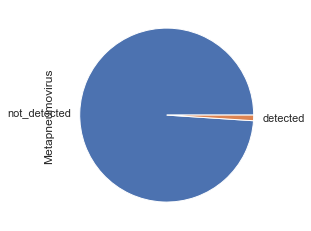

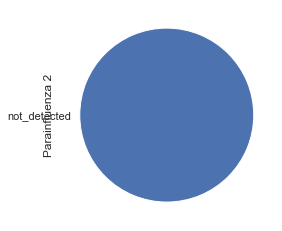

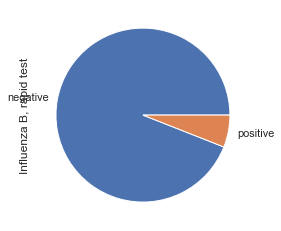

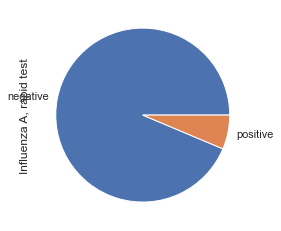

In [69]:
for col in df.select_dtypes('object'):
    plt.figure()
    df[col].value_counts().plot(kind='pie')

# Relationship Target/variable

In [70]:
# separate target unique values 
positive_df = df[df['SARS-Cov-2 exam result']=='positive']
negative_df = df[df['SARS-Cov-2 exam result']=='negative']

# Blood and viral subsets

In [71]:
missing_rate = df.isna().mean() 
# Define each subset according to the intervale value
blood_columns = df.columns[(missing_rate < 0.90) & (missing_rate > 0.88)]
viral_columns = df.columns[(missing_rate < 0.88) & (missing_rate > 0.76)]

# Target and Blood

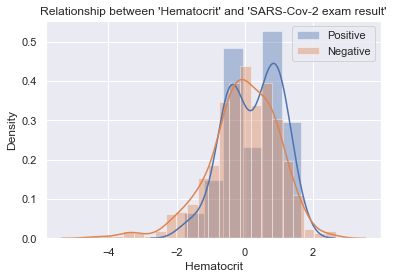

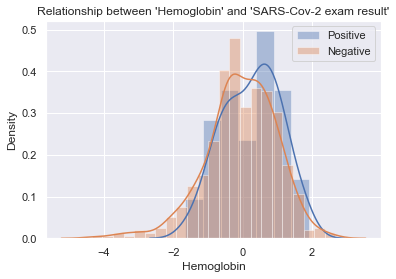

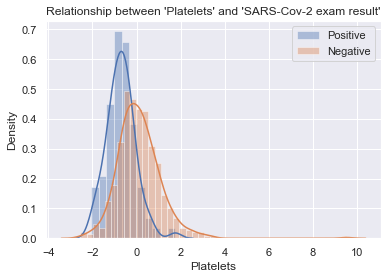

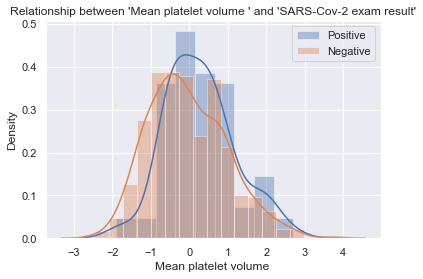

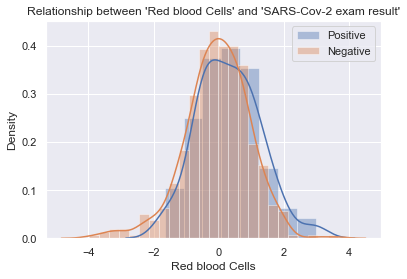

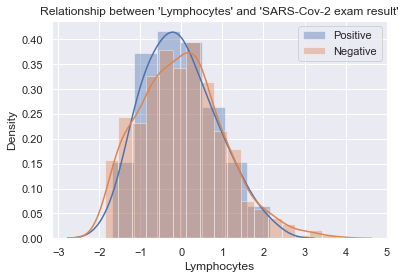

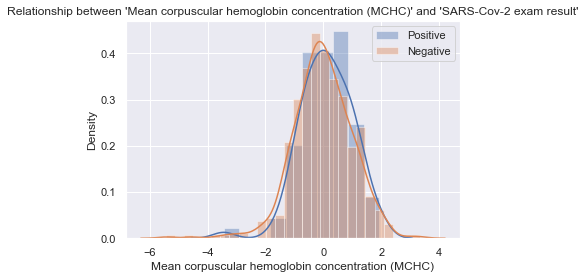

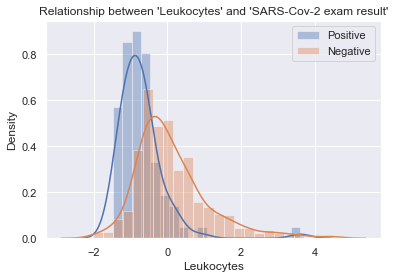

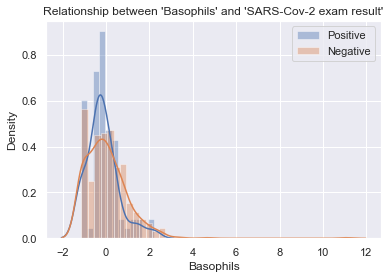

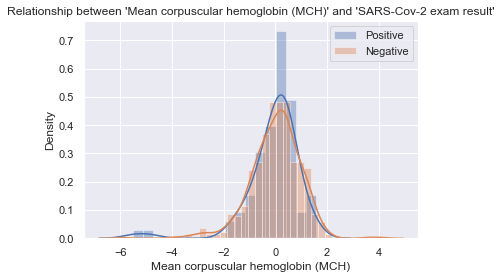

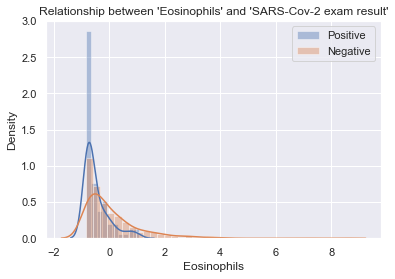

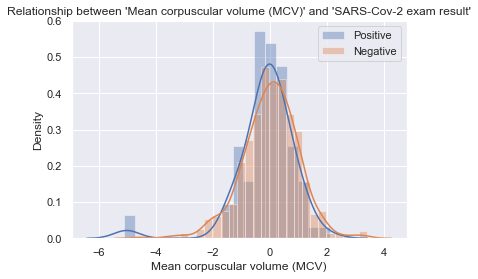

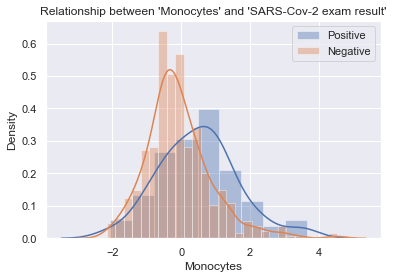

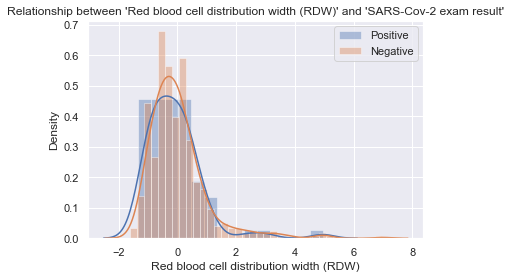

In [72]:
for col in blood_columns:
    plt.figure()
    sns.distplot(positive_df[col], label="Positive")
    sns.distplot(negative_df[col], label="Negative")
    plt.title(f'Relationship between \'{col}\' and \'SARS-Cov-2 exam result\'')
    plt.legend()

# Target and Viral

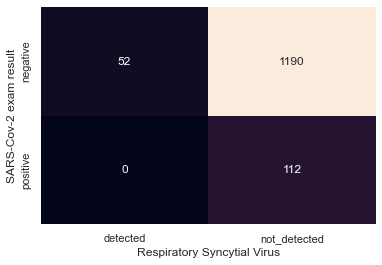

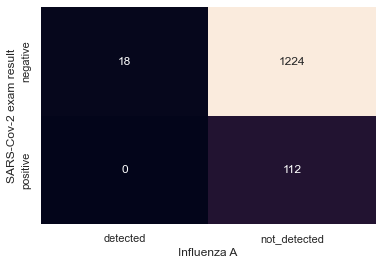

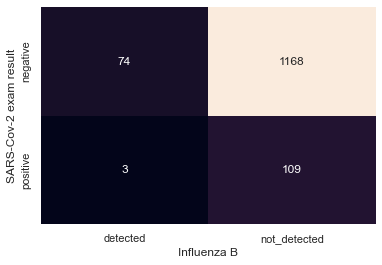

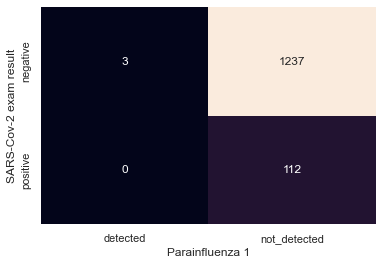

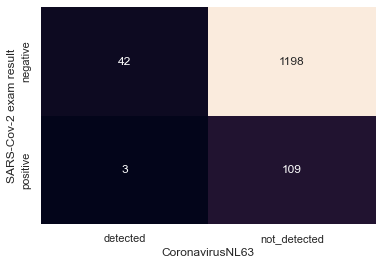

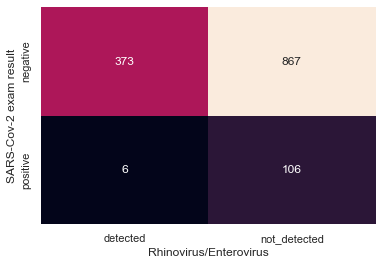

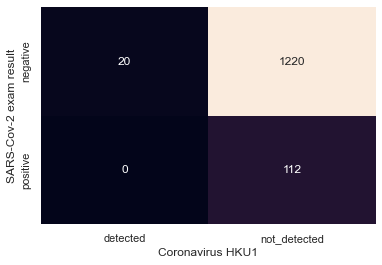

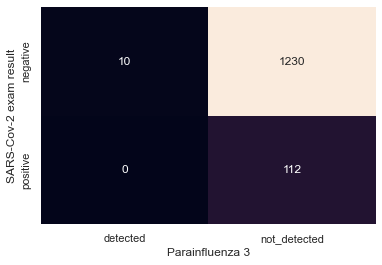

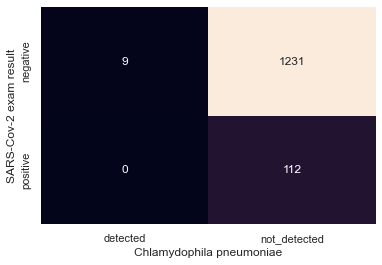

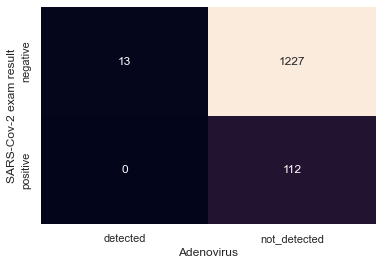

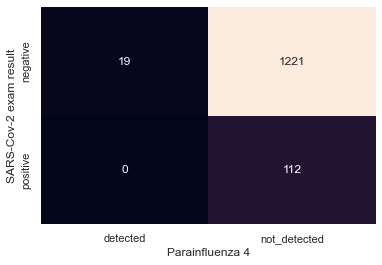

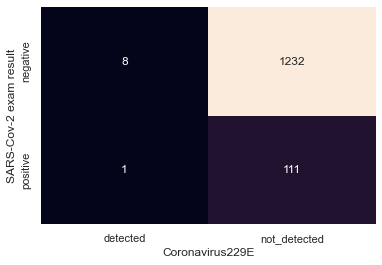

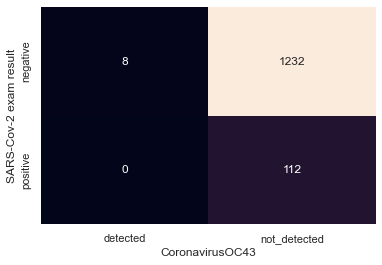

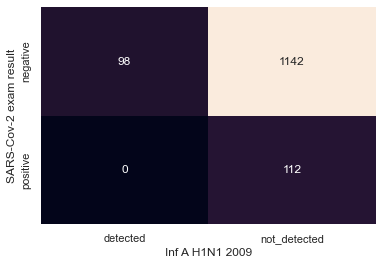

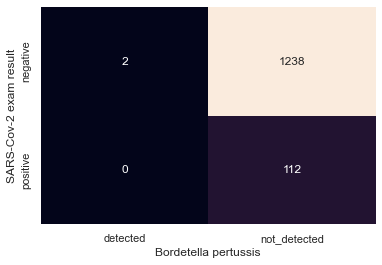

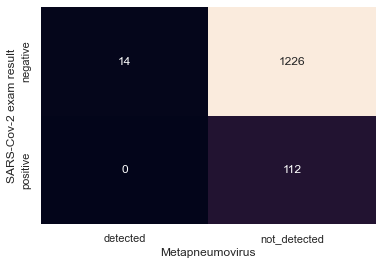

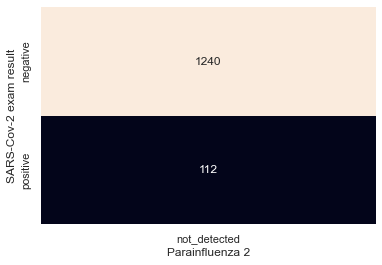

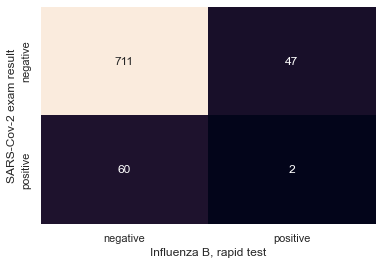

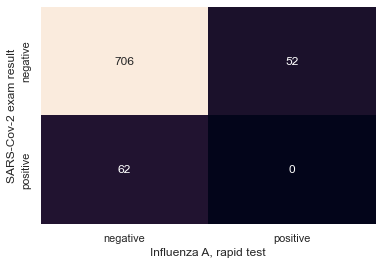

In [73]:
# Let's build a contingency table
for col in viral_columns:
    plt.figure()
    cross_tab = pd.crosstab(df['SARS-Cov-2 exam result'], df[col])
    sns.heatmap(cross_tab, cbar=False, annot=True, fmt="d")   

# Target and age

Text(0.5, 1.0, "Relation between 'Patient age quantile' and 'SARS-Cov-2 exam result'")

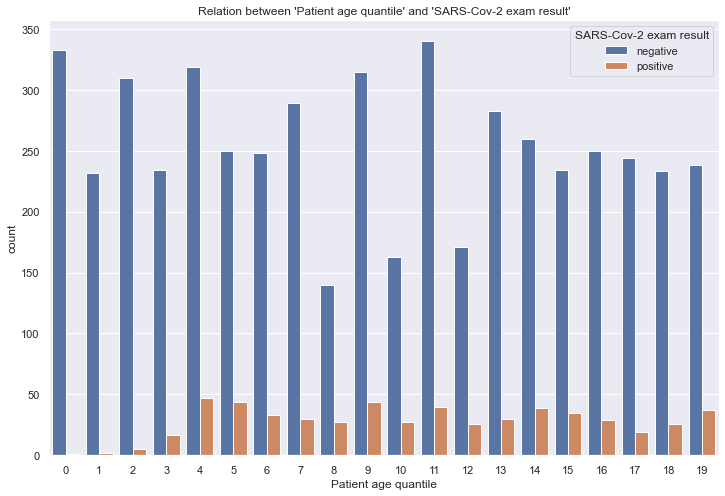

In [74]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Patient age quantile', hue='SARS-Cov-2 exam result', data=df)
plt.title("Relation between 'Patient age quantile' and 'SARS-Cov-2 exam result'")

# Advanced Analysis

# Relationship variable/variable

# Blood rate

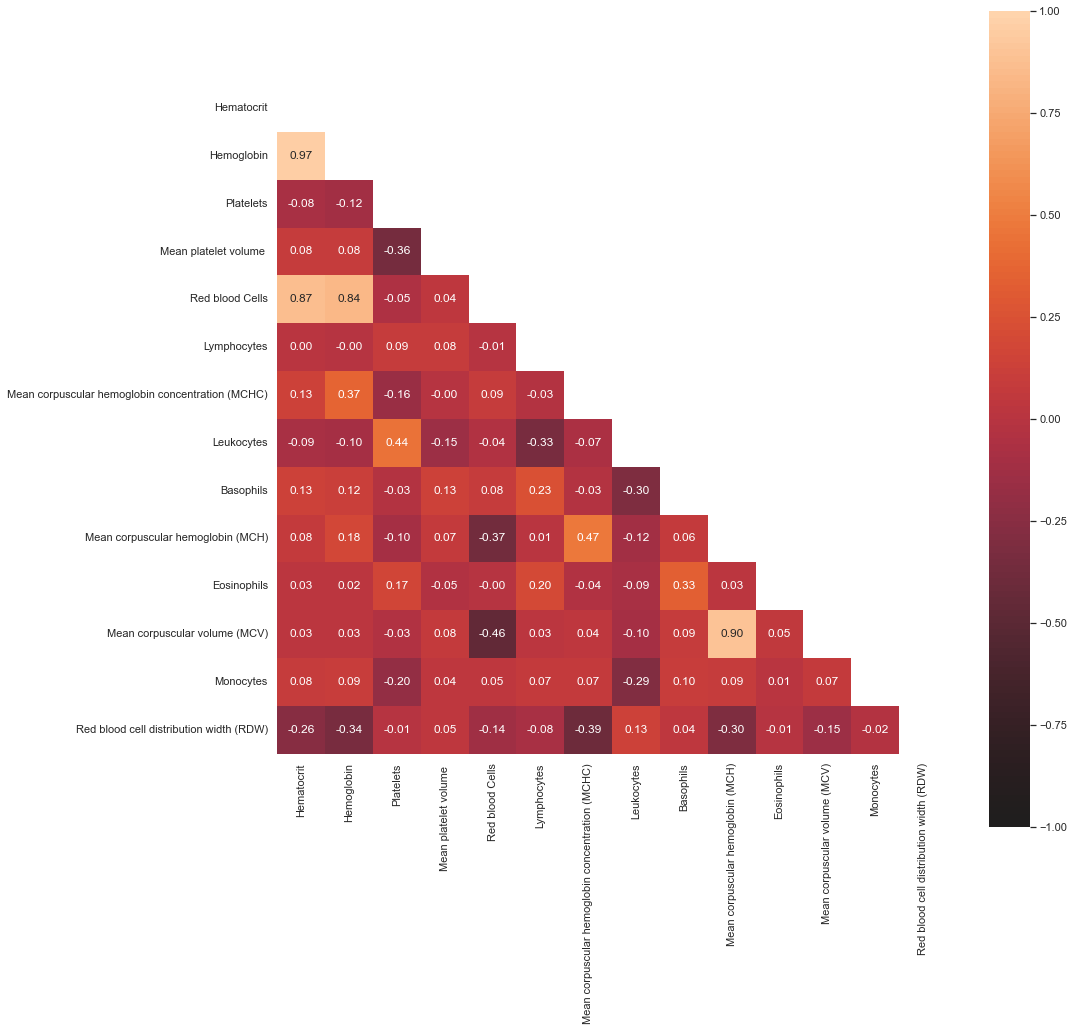

In [75]:
# Correlation matrix of all blood features
corr = df[blood_columns].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 15))
    ax = sns.heatmap(corr, mask=mask, vmin=-1, vmax=1,
                     annot=True, center=-1, fmt='.2f', square=True)

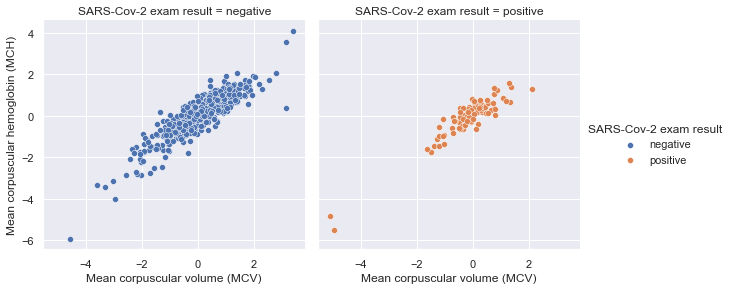

In [76]:
# MCV and MCH evolution according to the patient's status 
sns.FacetGrid(data=df, col='SARS-Cov-2 exam result', hue='SARS-Cov-2 exam result', 
              margin_titles=False, height=4.2).map_dataframe(sns.scatterplot, 
              x='Mean corpuscular volume (MCV)', y='Mean corpuscular hemoglobin (MCH)').add_legend()

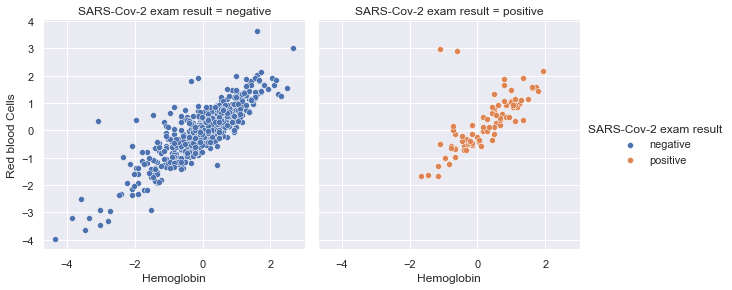

In [77]:
# Hemoglobin and Red blood Cells evolution according to the patient's status 
sns.FacetGrid(data=df, col='SARS-Cov-2 exam result', hue='SARS-Cov-2 exam result', margin_titles=False, 
              height=4.2).map_dataframe(sns.scatterplot, x='Hemoglobin', y='Red blood Cells').add_legend()

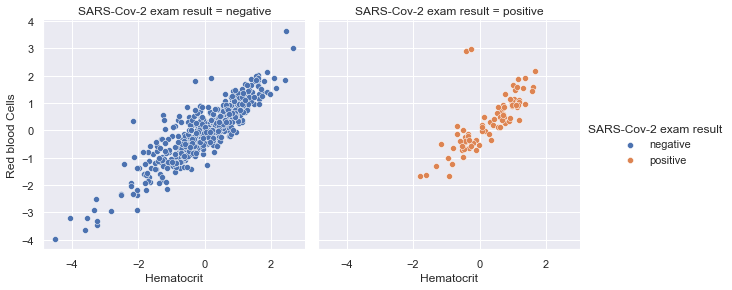

In [78]:
# Hemoglobin and Red blood Cells evolution according to the patient's status 
sns.FacetGrid(data=df, col='SARS-Cov-2 exam result', hue='SARS-Cov-2 exam result', margin_titles=False, 
              height=4.2).map_dataframe(sns.scatterplot, x='Hematocrit', y='Red blood Cells').add_legend()

# It's found that hemoglobin rate decreases considerably when the patient is diagnosed with covid. We will formulate a hypothesis about this in the following lines